In [6]:
import numpy

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\gilor\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-d4cdadb62aa7>", line 1, in <module>
    import numpy
  File "C:\Users\GILOR\AppData\Roaming\Python\Python37\site-packages\numpy\__init__.py", line 140, in <module>
    from . import _distributor_init
  File "C:\Users\GILOR\AppData\Roaming\Python\Python37\site-packages\numpy\_distributor_init.py", line 26, in <module>
    WinDLL(os.path.abspath(filename))
  File "c:\users\gilor\appdata\local\programs\python\python37-32\lib\ctypes\__init__.py", line 356, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: [WinError 193] %1 is not a valid Win32 application

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\gilor\appdata\local\programs\python\python37-32\l

OSError: [WinError 193] %1 is not a valid Win32 application

In [2]:
import pickle
import os
import numpy as np
import pandas as pd
from requests import get
from bs4 import BeautifulSoup
from time import sleep, time
from PIL import Image
from io import BytesIO, StringIO
from urllib.request import urlopen
from requests import get
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

OSError: [WinError 193] %1 is not a valid Win32 application

In [3]:
import keras.backend as K
import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from time import time
from sklearn.cluster import KMeans
from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec

from scipy.misc import imread
from sklearn.metrics import accuracy_score, normalized_mutual_info_score

OSError: [WinError 193] %1 is not a valid Win32 application

In [3]:
html = get('https://www.google.com/search?q=dung+beetle&rlz=1C1CHBF_enUS843US843&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjehKPamYvlAhXCxVkKHfnfAf8Q_AUIEygC&biw=1280&bih=610')
soup = BeautifulSoup(html.content, 'html.parser')

dungs = soup.findAll('img')

beetles = [beetle.get('src') for beetle in dungs]

In [4]:
from PIL import Image
from io import BytesIO, StringIO
from urllib.request import urlopen

dung_images = [Image.open(urlopen(beetle)) for beetle in beetles]

In [5]:
# cetonia_images = open("cetonia.pkl", 'rb')
# cetonia = pickle.load(cetonia_images, encoding='latin1')
# cetonia_images.close()

cuprea_images = open(r"C:\Users\GILOR\Desktop\data_science\Flatiron_projects\images_loop3.pkl" ,"rb")
cuprea = pickle.load(cuprea_images, encoding='latin1')
cuprea_images.close()

In [6]:
cuprea_imags = []
for i, image in enumerate(cuprea):
    image = image.resize((100, 100))
    image = image.convert(mode='L')
    image = np.array(image)
    cuprea_imags.append(image)

In [7]:
dunga_imags = []
for i, image in enumerate(dung_images):
    image = image.resize((100, 100))
    image = image.convert(mode='L')
    image = np.array(image)
    dunga_imags.append(image)

In [8]:
# turn the image list to numpy arrays
dunga_imags = np.asarray(dunga_imags)
cuprea_imags = np.asarray(cuprea_imags)

In [9]:
# standardize pixels
np_cuprea = cuprea_imags / 255
np_dungs = dunga_imags / 255

In [10]:
images = np.concatenate([dunga_imags, cuprea_imags], axis=0)
labels = np.concatenate([np.zeros(20), np.ones(20)], axis=0)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(cuprea_imags, np.ones(20), test_size=0.1)

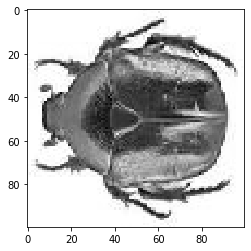

In [12]:
plt.imshow(np_cuprea[9], cmap='gray')

In [13]:
x_train = x_train.reshape(-1, 10000)
x_test = x_test.reshape(-1, 10000)

# this is our input placeholder
input_img = Input(shape=(10000,))

# "encoded" is the encoded representation of the input
encoded = Dense(4000, activation='relu')(input_img)
encoded = Dense(2000, activation='relu')(encoded)
encoded = Dense(1000, activation='relu')(encoded)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(10, activation='sigmoid')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(500, activation='relu')(encoded)
decoded = Dense(1000, activation='relu')(decoded)
decoded = Dense(2000, activation='relu')(decoded)
decoded = Dense(4000, activation='relu')(decoded)
decoded = Dense(10000)(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [14]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

autoencoder.compile(optimizer='adam', loss='mse')

estop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

train_history = autoencoder.fit(x_train, x_train, epochs=1, batch_size=1, 
                                validation_data=(x_test, x_test), callbacks=[estop])

Train on 18 samples, validate on 2 samples
Epoch 1/1
18/18 [==============================] - 25s 1s/step - loss: 19559.7918 - val_loss: 5370.2758


In [33]:
pred = autoencoder.predict(x_test)

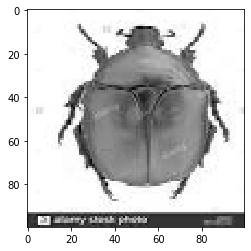

In [34]:
plt.imshow(x_test[0].reshape(100, 100), cmap='gray')

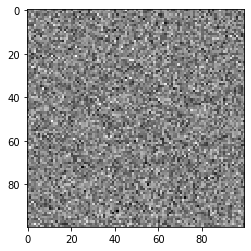

In [35]:
plt.imshow(pred[0].reshape(100, 100), cmap='gray')

# save fitted model using pickle

In [ ]:
# save the model
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 


In [ ]:
# load model

In [ ]:
# load the model
loaded_model = pickle.load(open(r'C:\Users\GILOR\Desktop\data_science\Flatiron_projects\autoencoder_test_model.sav', 'rb'))

results = loaded_model.predict(x_test)

plt.imshow(results[0].reshape(100, 100), cmap='gray')

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

# Opening a file from computer using cv2 change BGR to RBG and show it using matplotlib

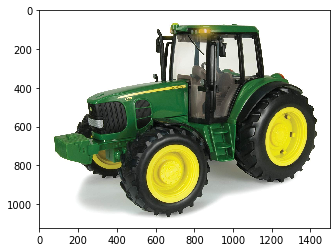

In [7]:
# turns an image to pixels
a1 = cv2.imread(r'C:\Users\GILOR\Desktop\tractor.jpg')

# change colors from BGR to RGB
a2 = a1[..., ::-1]
plt.imshow(a2)

# using cv2 to convert an RGB image to grayscale image

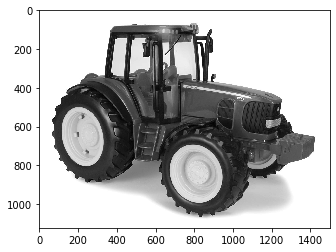

In [10]:
# gray scale image
gray_img = cv2.cvtColor(a1, cv2.COLOR_BGR2GRAY)
gray_img = gray_img[..., ::-1]
plt.imshow(gray_img, cmap='gray')

# resizing an an image using cv2

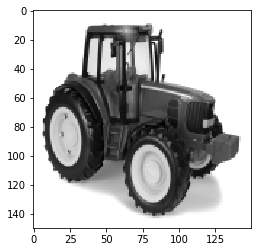

In [11]:
width = 150
height = 150
dim = (width, height)

resized = cv2.resize(gray_img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized, cmap='gray')

# load an image (jpeg only?) from the internet and open it

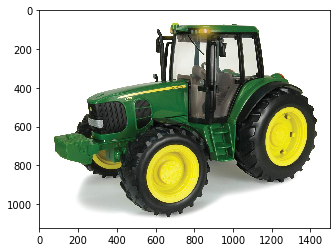

In [31]:
import numpy as np
import requests
from io import BytesIO
url = 'https://images-na.ssl-images-amazon.com/images/I/81iTjdmEEzL._SL1500_.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)

# Resizing  and gray scaling using the pillow library

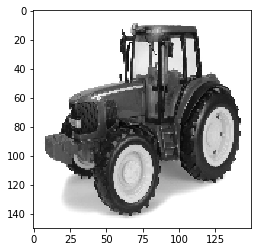

In [49]:
resized2 = img.resize(dim)
resized2_gray = resized2.convert(mode='L')
plt.imshow(resized2_gray, cmap ='gray')

# Gray Scale + resize and image file using CV2

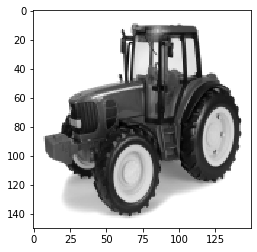

In [44]:
import numpy as np
import matplotlib.pyplot as plt

### the gray scale formula
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray = rgb2gray(a2)
resized2 = cv2.resize(gray, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized2, cmap='gray')
plt.show()

# globbing

In [1]:
from glob import glob
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv1D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

Using TensorFlow backend.
D:\Programs\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Programs\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Programs\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Programs\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarn

In [53]:
# # opening the image as a matrix
# images = [cv2.imread(file) for file in glob(r'E:\images2019\train_val2019\Damselflies\24\*.jpg')]

In [5]:
# opennign image  as jpeg
images2 = [Image.open(file) for file in glob(r'E:\images2019\train_val2019\Damselflies\24\*.jpg')]

In [6]:
image = []
for img in images2:
    img = img.resize((128, 128))
    img = img.convert(mode='L')
    img = np.array(img)
#     img = img.flatten()
    image.append(img)

In [7]:
np_images2 = np.asarray(image)

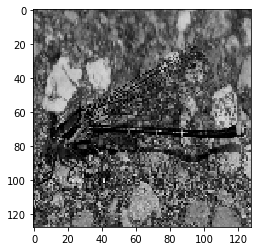

In [8]:
plt.imshow(np_images2[0], cmap='gray')

In [45]:
y = np.concatenate([np.ones(200), np.zeros(201)])
y = to_categorical(y)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(np_images2, y, random_state=42, test_size=0.2)

In [60]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
# y_train = np.expand_dims(y_train, axis=-1)
# y_test = np.expand_dims(y_test, axis=-1)

In [61]:
X_train.shape

(380, 128, 128, 1)

In [62]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(5,5) ,activation='tanh',input_shape=(128,128,1)))
model.add(Conv2D(64, (1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='categorical_crossentropy' ,optimizer='Adam',metrics=['accuracy'])

In [63]:
model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

Train on 380 samples, validate on 21 samples
Epoch 1/2
380/380 [==============================] - ETA: 26s - loss: 1.0316 - acc: 0.53 - ETA: 17s - loss: 3.5788 - acc: 0.56 - ETA: 13s - loss: nan - acc: 0.5833   - ETA: 10s - loss: nan - acc: 0.562 - ETA: 8s - loss: nan - acc: 0.562 - ETA: 7s - loss: nan - acc: 0.55 - ETA: 5s - loss: nan - acc: 0.54 - ETA: 4s - loss: nan - acc: 0.53 - ETA: 3s - loss: nan - acc: 0.52 - ETA: 2s - loss: nan - acc: 0.50 - ETA: 1s - loss: nan - acc: 0.51 - 14s 37ms/step - loss: nan - acc: 0.5184 - val_loss: nan - val_acc: 0.4762
Epoch 2/2
380/380 [==============================] - ETA: 11s - loss: nan - acc: 0.562 - ETA: 10s - loss: nan - acc: 0.546 - ETA: 9s - loss: nan - acc: 0.531 - ETA: 8s - loss: nan - acc: 0.51 - ETA: 6s - loss: nan - acc: 0.51 - ETA: 5s - loss: nan - acc: 0.48 - ETA: 4s - loss: nan - acc: 0.50 - ETA: 3s - loss: nan - acc: 0.51 - ETA: 2s - loss: nan - acc: 0.52 - ETA: 1s - loss: nan - acc: 0.52 - ETA: 0s - loss: nan - acc: 0.51 - 12s 32

In [64]:
prediction = model.predict_classes(X_test)

In [65]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [75]:
X_train1 = X_train.reshape(-1, 16384)
X_test1 = X_test.reshape(-1, 16384)

# this is our input placeholder
input_img2 = Input(shape=(16384,))

# "encoded" is the encoded representation of the input
encoded = Dense(4000, activation='relu')(input_img2)
encoded = Dense(2000, activation='relu')(encoded)
encoded = Dense(1000, activation='relu')(encoded)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(10, activation='sigmoid')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(500, activation='relu')(encoded)
decoded = Dense(1000, activation='relu')(decoded)
decoded = Dense(2000, activation='relu')(decoded)
decoded = Dense(4000, activation='relu')(decoded)
decoded = Dense(16384)(decoded)

# this model maps an input to its reconstruction
autoencoder2 = Model(input_img2, decoded)

In [76]:
# this model maps an input to its encoded representation
# encoder2 = Model(input_img2, encoded)

autoencoder2.compile(optimizer='adam', loss='mse')

estop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

train_history = autoencoder2.fit(X_train1, X_train1, epochs=2, batch_size=1, 
                                validation_data=(X_test1, X_test1), callbacks=[estop])

Train on 320 samples, validate on 81 samples
Epoch 1/2
286/320 [=========================>....] - ETA: 39:56 - loss: 22242.15 - ETA: 28:11 - loss: 20485.72 - ETA: 22:51 - loss: 18069.28 - ETA: 19:58 - loss: 20021.32 - ETA: 18:22 - loss: 18932.11 - ETA: 17:15 - loss: 18800.01 - ETA: 16:20 - loss: 17245.63 - ETA: 15:47 - loss: 15521.36 - ETA: 15:10 - loss: 14299.02 - ETA: 14:40 - loss: 13246.32 - ETA: 14:19 - loss: 12470.71 - ETA: 13:57 - loss: 11817.91 - ETA: 13:38 - loss: 11860.49 - ETA: 13:22 - loss: 11399.96 - ETA: 13:07 - loss: 11129.41 - ETA: 12:54 - loss: 10626.73 - ETA: 12:43 - loss: 10433.33 - ETA: 12:31 - loss: 10059.94 - ETA: 12:21 - loss: 9739.6200 - ETA: 12:12 - loss: 9363.026 - ETA: 12:04 - loss: 9446.991 - ETA: 11:55 - loss: 9398.449 - ETA: 11:48 - loss: 9376.872 - ETA: 11:41 - loss: 9282.776 - ETA: 11:34 - loss: 9051.993 - ETA: 11:28 - loss: 8973.277 - ETA: 11:34 - loss: 8701.187 - ETA: 11:33 - loss: 8595.620 - ETA: 11:29 - loss: 8413.588 - ETA: 11:26 - loss: 8281.962 - E

289/320 [==========================>...] - ETA: 12:06 - loss: 1723.450 - ETA: 12:01 - loss: 2483.430 - ETA: 12:02 - loss: 3587.718 - ETA: 12:07 - loss: 5099.132 - ETA: 11:55 - loss: 5007.132 - ETA: 11:43 - loss: 5181.111 - ETA: 11:30 - loss: 5741.845 - ETA: 11:31 - loss: 5269.267 - ETA: 11:28 - loss: 5626.707 - ETA: 11:23 - loss: 5197.896 - ETA: 11:25 - loss: 5218.845 - ETA: 11:23 - loss: 4999.117 - ETA: 11:21 - loss: 4989.931 - ETA: 11:17 - loss: 5148.465 - ETA: 11:10 - loss: 5144.470 - ETA: 11:05 - loss: 4893.837 - ETA: 11:07 - loss: 4703.254 - ETA: 11:09 - loss: 4668.270 - ETA: 11:06 - loss: 4524.198 - ETA: 11:03 - loss: 4404.802 - ETA: 11:02 - loss: 4240.218 - ETA: 10:59 - loss: 4206.335 - ETA: 10:56 - loss: 4336.133 - ETA: 10:51 - loss: 4298.599 - ETA: 10:47 - loss: 4386.527 - ETA: 10:43 - loss: 4419.849 - ETA: 10:38 - loss: 4429.235 - ETA: 10:33 - loss: 4378.797 - ETA: 10:29 - loss: 4342.234 - ETA: 10:26 - loss: 4306.179 - ETA: 10:22 - loss: 4491.598 - ETA: 10:18 - loss: 4541.313

320/320 [==============================] - ETA: 1:00 - loss: 3712.97 - ETA: 58s - loss: 3718.0457 - ETA: 56s - loss: 3720.164 - ETA: 54s - loss: 3727.380 - ETA: 52s - loss: 3730.395 - ETA: 50s - loss: 3725.665 - ETA: 48s - loss: 3718.580 - ETA: 46s - loss: 3720.294 - ETA: 44s - loss: 3717.542 - ETA: 42s - loss: 3716.634 - ETA: 40s - loss: 3712.733 - ETA: 38s - loss: 3713.443 - ETA: 36s - loss: 3714.923 - ETA: 34s - loss: 3726.062 - ETA: 32s - loss: 3726.337 - ETA: 30s - loss: 3725.938 - ETA: 28s - loss: 3722.636 - ETA: 26s - loss: 3719.921 - ETA: 24s - loss: 3717.000 - ETA: 22s - loss: 3711.358 - ETA: 20s - loss: 3715.179 - ETA: 18s - loss: 3720.941 - ETA: 16s - loss: 3723.937 - ETA: 14s - loss: 3733.783 - ETA: 12s - loss: 3729.188 - ETA: 10s - loss: 3740.801 - ETA: 8s - loss: 3736.967 - ETA: 6s - loss: 3729.63 - ETA: 4s - loss: 3741.36 - ETA: 2s - loss: 3736.86 - 655s 2s/step - loss: 3736.2126 - val_loss: 4379.9153


In [77]:
preds = autoencoder2.predict(X_test1)

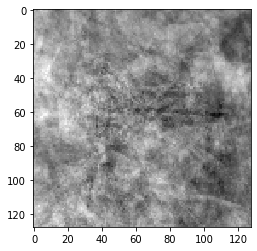

In [78]:
plt.imshow(preds[0].reshape(128, 128), cmap='gray')

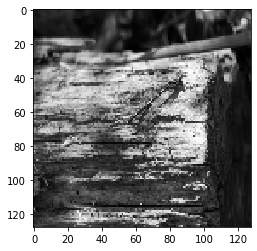

In [79]:
plt.imshow(X_test1[0].reshape(128, 128), cmap='gray')

In [101]:
# save the model
filename = 'autocoder_1.sav'
pickle.dump(autoencoder2, open(filename, 'wb'))

# image rotation

In [2]:
from PIL import Image
img = Image.open(r'C:\Users\GILOR\Desktop\tractor.jpg')

In [21]:
# rotate it by 45 degrees
rotated = img.rotate(45)

rotated2 = img.rotate(90)

rotated3 = img.rotate(135)

rotated4 = img.rotate(180)

rotated5 = img.rotate(225)

rotated6 = img.rotate(270)

# rotate it by 180 degrees
transposed  = img.transpose(Image.FLIP_LEFT_RIGHT)

 
# display the original image
img.show()

# display the image rotated by 45 degrees
rotated.show()

rotated2.show()
rotated3.show()
rotated4.show()
rotated5.show()
rotated6.show()

# display the transposed image
transposed.show()

In [15]:
# save image to different path
transposed.save(r"C:\Users\GILOR\Desktop\tractor_46.jpg") 

In [ ]:
# remove background

In [ ]:
import cv2
import numpy as np

#== Parameters =======================================================================
BLUR = 21
CANNY_THRESH_1 = 10
CANNY_THRESH_2 = 300
MASK_DILATE_ITER = 5
MASK_ERODE_ITER = 5
MASK_COLOR = (0.0,0.0,1.0) # In BGR format


#== Processing =======================================================================

#-- Read image -----------------------------------------------------------------------
img = cv2.imread(r'E:\processed_damsel_images\image1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#-- Edge detection -------------------------------------------------------------------
edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

#-- Find contours in edges, sort by area ---------------------------------------------
contour_info = []
# _, contours, B = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# Previously, for a previous version of cv2, this line was: 
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# Thanks to notes from commenters, I've updated the code but left this note
for c in contours:
    contour_info.append((c,
                         cv2.isContourConvex(c),
                         cv2.contourArea(c)
                       ))
contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
max_contour = contour_info[0]

#-- Create empty mask, draw filled polygon on it corresponding to largest contour ----
# Mask is black, polygon is white
mask = np.zeros(edges.shape)
cv2.fillConvexPoly(mask, max_contour[0], (255))

#-- Smooth mask, then blur it --------------------------------------------------------
mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

#-- Blend masked img into MASK_COLOR background --------------------------------------
mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
img         = img.astype('float32') / 255.0                 #  for easy blending

masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR) # Blend
masked = (masked * 255).astype('uint8')                     # Convert back to 8-bit 

# split image into channels
c_red, c_green, c_blue = cv2.split(img)

# merge with mask got on one of a previous steps
img_a = cv2.merge((c_red, c_green, c_blue, mask.astype('float32') / 255.0))

# show on screen (optional in jupiter)

plt.imshow(img_a)
plt.show()

# cv2.imshow('img', masked)                                   # Display
# cv2.waitKey()

#cv2.imwrite('C:/Temp/person-masked.jpg', masked)           # Save